# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

623
['rikitea', 'mar del plata', 'kavieng', 'hobart', 'russell', 'carnarvon', 'saint-philippe', 'punta arenas', 'puerto ayora', 'avarua', 'samusu', 'port alfred', 'clyde river', 'katsuura', 'taksimo', 'petropavlovsk-kamchatskiy', 'khandyga', 'port hedland', 'catanzaro', 'cape town', 'pierre', 'norman wells', 'bethel', 'vaini', 'tiksi', 'sal rei', 'ushuaia', 'fortuna', 'albany', 'meulaboh', 'urumqi', 'turtkul', 'taltal', 'busselton', 'juneau', 'langham', 'castro', 'arraial do cabo', 'lebu', 'provideniya', 'grand river south east', 'chuy', 'taolanaro', 'laranjeiras do sul', 'iqaluit', 'hermanus', 'airai', 'upernavik', 'guerrero negro', 'mataura', 'new norfolk', 'souillac', 'ilulissat', 'sola', 'maloshuyka', 'bluff', 'sorvag', 'velikie luki', 'cambrils', 'chicama', 'sangar', 'attawapiskat', 'port hardy', 'lolua', 'mogadishu', 'ayagoz', 'khatanga', 'mana', 'hilo', 'narsaq', 'were ilu', 'alice springs', 'nikolskoye', 'saint-joseph', 'ketchikan', 'tasiilaq', 'te anau', 'joshimath', 'dombarov

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

lat = []
long = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
finalcities = []

counter = 0
secondcounter = 0
print(len(cities))
print(f"Beginning Data Retrieval for {len(cities)} cities \n-----------------------------")
for city  in cities:
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    response = requests.get(url).json()
    try:
        lat.append(response['coord']["lat"])
        long.append(response['coord']["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        counter += 1
        print(f"Processing Record {counter} of Set 1 | {city}")
        finalcities.append(city)
    except: 
        print(f"{city} not found")
        cities.remove(city)
        secondcounter +=1
        pass
    time.sleep(3)
print(f"----------------------------- \nData Retrieval Complete {counter} cities analyzed \n-----------------------------")

623
Beginning Data Retrieval for 623 cities 
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | russell
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | avarua
samusu not found
Processing Record 11 of Set 1 | clyde river
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | taksimo
Processing Record 14 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 15 of Set 1 | khandyga
Processing Record 16 of Set 1 | port hedland
Processing Record 17 of Set 1 | catanzaro
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | pierre
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | bethel
Processing Record 

Processing Record 186 of Set 1 | huai thalaeng
Processing Record 187 of Set 1 | porto recanati
Processing Record 188 of Set 1 | presidencia roque saenz pena
Processing Record 189 of Set 1 | de aar
Processing Record 190 of Set 1 | grojec
Processing Record 191 of Set 1 | vao
Processing Record 192 of Set 1 | vung tau
Processing Record 193 of Set 1 | harboore
mys shmidta not found
Processing Record 194 of Set 1 | hoktember
Processing Record 195 of Set 1 | muriti
Processing Record 196 of Set 1 | coahuayana
Processing Record 197 of Set 1 | kristianstad
Processing Record 198 of Set 1 | tigil
Processing Record 199 of Set 1 | los llanos de aridane
Processing Record 200 of Set 1 | coquimbo
Processing Record 201 of Set 1 | port augusta
Processing Record 202 of Set 1 | luderitz
Processing Record 203 of Set 1 | bambous virieux
Processing Record 204 of Set 1 | opuwo
Processing Record 205 of Set 1 | jerez
Processing Record 206 of Set 1 | tofield
Processing Record 207 of Set 1 | visnes
Processing Reco

Processing Record 373 of Set 1 | cockburn town
sento se not found
Processing Record 374 of Set 1 | fairbanks
Processing Record 375 of Set 1 | fuengirola
Processing Record 376 of Set 1 | pochutla
Processing Record 377 of Set 1 | lishui
Processing Record 378 of Set 1 | beira
Processing Record 379 of Set 1 | progreso
Processing Record 380 of Set 1 | constitucion
Processing Record 381 of Set 1 | ola
Processing Record 382 of Set 1 | takestan
Processing Record 383 of Set 1 | kungurtug
Processing Record 384 of Set 1 | yulara
Processing Record 385 of Set 1 | mattru
zhanatas not found
Processing Record 386 of Set 1 | perth
Processing Record 387 of Set 1 | kasungu
Processing Record 388 of Set 1 | padre bernardo
Processing Record 389 of Set 1 | inhambane
Processing Record 390 of Set 1 | strezhevoy
Processing Record 391 of Set 1 | washington
Processing Record 392 of Set 1 | santa cruz do rio pardo
Processing Record 393 of Set 1 | caceres
Processing Record 394 of Set 1 | tiarei
Processing Record 39

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
dicter = {"City": finalcities,
          "Lat": lat, 
          "Lon" : long, 
          "Max_Temp": Max_Temp, 
          "Humidity" : Humidity, 
          "Cloudiness" : Cloudiness, 
          "Wind_Speed" : Wind_Speed, 
          "Country" : Country,
          "Date" : Date}
city_frame = pd.DataFrame(dicter)
city_frame.to_csv('output_data/city_data.csv', index = False)
city_frame.head()

,City,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,rikitea,-23.1203,-134.9692,77.65,74,9,5.26,PF,1618812816
1,mar del plata,-38.0023,-57.5575,64.99,100,0,4.61,AR,1618812819
2,kavieng,-2.5744,150.7967,83.82,71,98,10.22,PG,1618812823
3,hobart,-42.8794,147.3294,66.20,37,75,24.16,AU,1618812622
4,russell,32.3502,-85.1999,60.80,76,90,3.44,US,1618812830


In [24]:
city_frame.describe()

,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.00000,5.230000e+02
mean,18.952229,17.596327,60.450784,66.166348,51.950287,7.62348,1.618814e+09
std,33.875698,91.346793,20.935739,22.453721,39.736313,4.97835,5.949919e+02
min,-54.800000,-175.200000,-0.670000,7.000000,0.000000,0.27000,1.618813e+09
25%,-10.021150,-64.062150,45.760000,51.000000,8.000000,3.88000,1.618813e+09
50%,21.461200,20.040300,65.660000,70.000000,56.000000,6.85000,1.618814e+09
75%,48.968400,101.884550,75.695000,84.000000,91.000000,10.50000,1.618814e+09
max,78.218600,178.416700,100.490000,100.000000,100.000000,24.61000,1.618815e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data = city_frame.loc[city_frame["Humidity"] < 100]
clean_city_data
clean_city_data.to_csv('output_data/clean_city_data.csv', index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

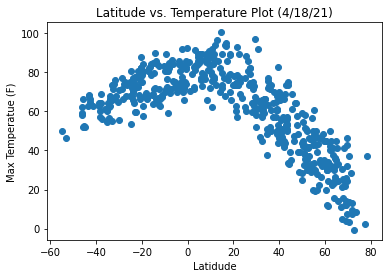

In [26]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max_Temp"])
plt.xlabel("Latidude")
plt.ylabel("Max Temperatue (F)")
plt.title("Latitude vs. Temperature Plot (4/18/21)")
plt.savefig('output_data/lat_vs_temp.png')
plt.show()

## Latitude vs. Humidity Plot

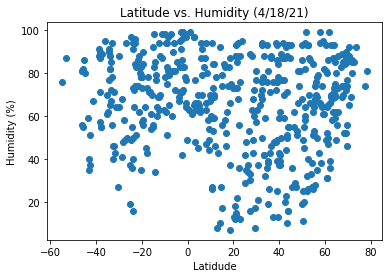

In [27]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"])
plt.xlabel("Latidude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity (4/18/21)")
plt.savefig('output_data/lat_vs_humdity.png')
plt.show()

## Latitude vs. Cloudiness Plot

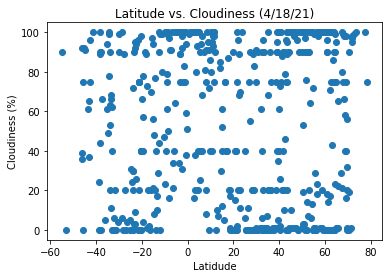

In [28]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"])
plt.xlabel("Latidude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness (4/18/21)")
plt.savefig('output_data/lat_vs_cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

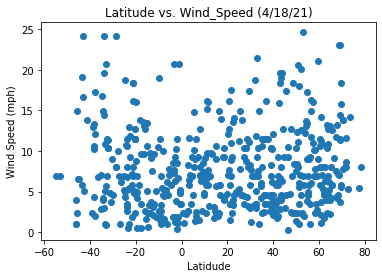

In [29]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind_Speed"])
plt.xlabel("Latidude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind_Speed (4/18/21)")
plt.savefig('output_data/lat_vs_wind_speed.png')
plt.show()

## Linear Regression

In [30]:
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]
northern_hemisphere.to_csv('output_data/northern_hemisphere_data.csv', index = False)
southern_hemisphere .to_csv('output_data/southern_hemisphere_data.csv', index = False)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

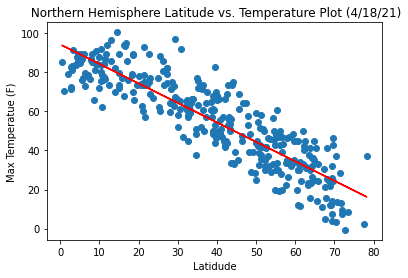

r =-0.8864370731338731


In [31]:
(slope, intercept, rvaluem, pvalue, stderr) = st.linregress(northern_hemisphere["Lat"], northern_hemisphere["Max_Temp"])
regress_values = (northern_hemisphere["Lat"] * slope) + intercept
plt.plot(northern_hemisphere["Lat"], regress_values, color = "r")
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max_Temp"])
plt.xlabel("Latidude")
plt.ylabel("Max Temperatue (F)")
plt.title(" Northern Hemisphere Latitude vs. Temperature Plot (4/18/21)")
plt.savefig('output_data/northern_lat_vs_temp.png')
plt.show()
corcoefficient = st.pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Max_Temp"])
print(f"r ={corcoefficient[0]}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

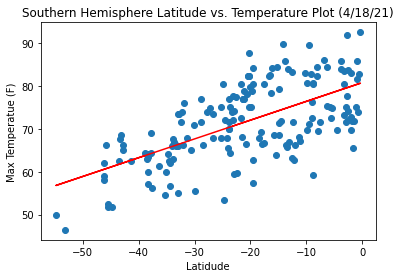

r =0.631016361170563


In [32]:
(slope, intercept, rvaluem, pvalue, stderr) = st.linregress(southern_hemisphere["Lat"], southern_hemisphere["Max_Temp"])
regress_values = (southern_hemisphere["Lat"] * slope) + intercept
plt.plot(southern_hemisphere["Lat"], regress_values, color = "r")
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max_Temp"])
plt.xlabel("Latidude")
plt.ylabel("Max Temperatue (F)")
plt.title("Southern Hemisphere Latitude vs. Temperature Plot (4/18/21)")
plt.savefig('output_data/southern_lat_vs_temp.png')
plt.show()
corcoefficient = st.pearsonr(southern_hemisphere["Lat"], southern_hemisphere["Max_Temp"])
print(f"r ={corcoefficient[0]}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

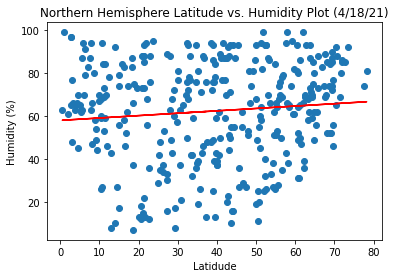

r =0.09698789218507436


In [33]:
(slope, intercept, rvaluem, pvalue, stderr) = st.linregress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
regress_values = (northern_hemisphere["Lat"] * slope) + intercept
plt.plot(northern_hemisphere["Lat"], regress_values, color = "r")
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
plt.xlabel("Latidude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Latitude vs. Humidity Plot (4/18/21)")
plt.savefig('output_data/northern_lat_vs_humidity.png')
plt.show()
corcoefficient = st.pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
print(f"r ={corcoefficient[0]}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

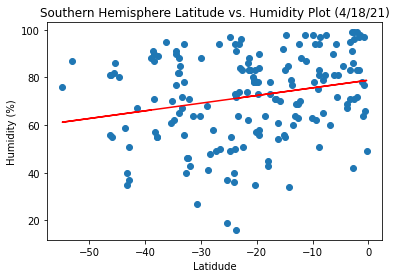

r =0.23143393256760036


In [34]:
(slope, intercept, rvaluem, pvalue, stderr) = st.linregress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
regress_values = (southern_hemisphere["Lat"] * slope) + intercept
plt.plot(southern_hemisphere["Lat"], regress_values, color = "r")
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
plt.xlabel("Latidude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Latitude vs. Humidity Plot (4/18/21)")
plt.savefig('output_data/southern_lat_vs_humidity.png')
plt.show()
corcoefficient = st.pearsonr(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
print(f"r ={corcoefficient[0]}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

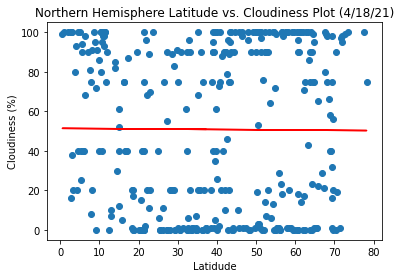

r =-0.007129236348930364


In [35]:
(slope, intercept, rvaluem, pvalue, stderr) = st.linregress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
regress_values = (northern_hemisphere["Lat"] * slope) + intercept
plt.plot(northern_hemisphere["Lat"], regress_values, color = "r")
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
plt.xlabel("Latidude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Latitude vs. Cloudiness Plot (4/18/21)")
plt.savefig('output_data/northern_lat_vs_cloudiness.png')
plt.show()
corcoefficient = st.pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
print(f"r ={corcoefficient[0]}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

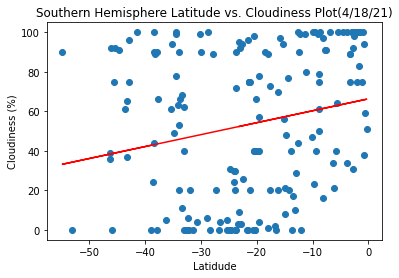

r =0.2135984867702874


In [36]:
(slope, intercept, rvaluem, pvalue, stderr) = st.linregress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
regress_values = (southern_hemisphere["Lat"] * slope) + intercept
plt.plot(southern_hemisphere["Lat"], regress_values, color = "r")
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
plt.xlabel("Latidude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere Latitude vs. Cloudiness Plot(4/18/21)")
plt.savefig('output_data/southern_lat_vs_cloudiness.png')
plt.show()
corcoefficient = st.pearsonr(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
print(f"r ={corcoefficient[0]}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

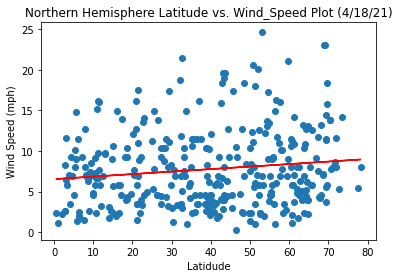

r =0.13235195853225698


In [37]:
(slope, intercept, rvaluem, pvalue, stderr) = st.linregress(northern_hemisphere["Lat"], northern_hemisphere["Wind_Speed"])
regress_values = (northern_hemisphere["Lat"] * slope) + intercept
plt.plot(northern_hemisphere["Lat"], regress_values, color = "r")
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind_Speed"])
plt.xlabel("Latidude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere Latitude vs. Wind_Speed Plot (4/18/21)")
plt.savefig('output_data/northern_lat_vs_wind_speed.png')
plt.show()
corcoefficient = st.pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Wind_Speed"])
print(f"r ={corcoefficient[0]}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

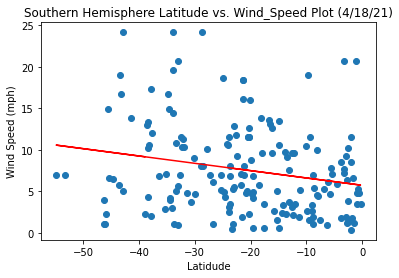

r =-0.21431777206203978


In [38]:
(slope, intercept, rvaluem, pvalue, stderr) = st.linregress(southern_hemisphere["Lat"], southern_hemisphere["Wind_Speed"])
regress_values = (southern_hemisphere["Lat"] * slope) + intercept
plt.plot(southern_hemisphere["Lat"], regress_values, color = "r")
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind_Speed"])
plt.xlabel("Latidude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere Latitude vs. Wind_Speed Plot (4/18/21)")
plt.savefig('output_data/southern_lat_vs_wind_speed.png')
plt.show()
corcoefficient = st.pearsonr(southern_hemisphere["Lat"], southern_hemisphere["Wind_Speed"])
print(f"r ={corcoefficient[0]}")